In [1]:
# imports libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


# EDA

In [2]:
# Import database
# Check the 3 csv files
df_2018=pd.read_csv("data_2018.csv")
df_2019=pd.read_csv("data_2019.csv")
df_2020=pd.read_csv("data_2020.csv")

# Working on copies of the original dataframes
df18=df_2018.copy()
df19=df_2019.copy()
df20=df_2020.copy()

In [3]:
# Check correct display of the files
print(df18.head())  #26 columns
print(df19.head())  #26 columns
print(df20.head())  #27 columns

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1

In [4]:
# Check different columns
df18.info()
df19.info()
df20.info()
# 1 column is empty in 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [5]:
# Drop column 'Unnamed: 8' from df_2020
df20 = df20.drop(columns=['Unnamed: 8'])

#### Anomalies

In [6]:
### Columns' names are different in dataframes
# Compare columns' names of two dataframes
for i in range (len(df18.columns)):
    if df18.columns[i] != df19.columns[i] != df20.columns[i]:
        print(f"{df18.columns[i]} {df19.columns[i]} {df20.columns[i]}")
# datas from 2019 have different columns' names than 2018 and 2020

E.C EC E.C
CO3 CO_-2  CO3
HCO3 HCO_ -  HCO3
Cl Cl - Cl
F F - F
NO3  NO3-  NO3 
SO4 SO4-2 SO4
Na Na+ Na
K K+ K
Ca Ca+2 Ca
Mg Mg+2 Mg


In [7]:
# Rename columns from 2019 dataframe
df19.columns = df18.columns  # This one is less flexible than using .rename() from pandas
# df19 = df19.rename(columns=dict(zip(df19.columns, df18.columns)))

#### Duplicates

In [8]:
# Check total duplicates
df18.duplicated().sum(), df19.duplicated().sum(), df20.duplicated().sum()

(0, 0, 0)

#### Concatenate

In [9]:
df=pd.concat([df18, df19, df20])

In [10]:
df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


#### Missing datas

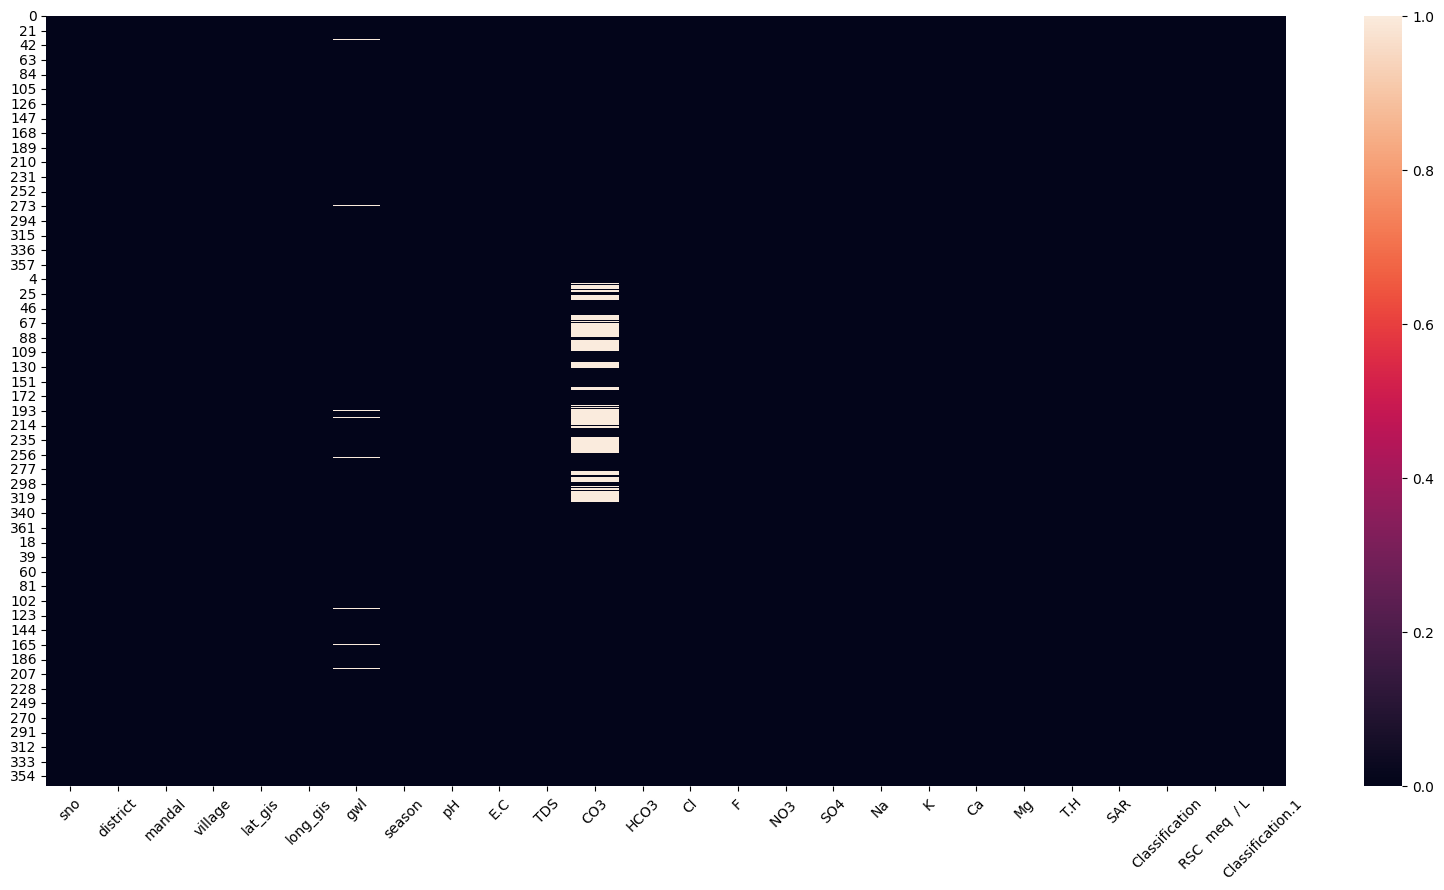

In [11]:
# Visualize missing datas
plt.figure(figsize=(20,10))     
sns.heatmap(df.isna()) 
plt.xticks(rotation=45)   
plt.show() 

In [12]:
# Check for percentages of missing values in each dataframe
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=True).round(2)

# drop 1% missing (I won't take any risk of modifying for so few)
# 14% : check by boxplot (if not many outliers : mean, else median)

sno                  0.00
Classification       0.00
SAR                  0.00
T.H                  0.00
Mg                   0.00
Ca                   0.00
K                    0.00
Na                   0.00
SO4                  0.00
NO3                  0.00
F                    0.00
Cl                   0.00
HCO3                 0.00
TDS                  0.00
E.C                  0.00
pH                   0.00
season               0.00
long_gis             0.00
lat_gis              0.00
village              0.00
mandal               0.00
district             0.00
RSC  meq  / L        0.00
Classification.1     0.00
gwl                  0.99
CO3                 14.47
dtype: float64

<Axes: xlabel='CO3'>

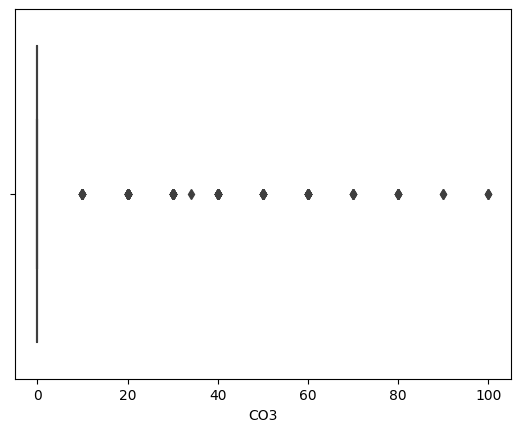

In [13]:
# Check outliers for CO3
sns.boxplot(x=df['CO3'])  

In [14]:
# Check total number of missing values for each different value in CO3 column
df['CO3'].value_counts()

CO3
0.000      780
20.000      44
30.000      29
40.000      27
60.000      21
50.000      15
10.000      11
80.000       8
70.000       5
100.000      3
90.000       2
34.034       1
Name: count, dtype: int64

In [15]:
df['Classification'].value_counts()

Classification
C3S1    696
C2S1    248
C4S1     87
C4S2     36
C3S2     12
C4S4      7
C3S3      6
C4S3      5
C1S1      3
OG        2
O.G       2
C3S4      1
C2S2      1
Name: count, dtype: int64

In [16]:
# Rename Classification)

# Define a mapping dictionary for label replacement
label_mapping = {
    'C2S1|C2S2|C2S2': 'Moderate',
    'C4S3|C4S2|C4S1|C4S4|C3S4': 'Bad',
    'C3S1|C3S2|C3S3': 'Poor',
    'C1S1' : 'Good'
}

# Apply label replacement
df['Classification'] = df['Classification'].replace(label_mapping, regex=True)

# Drop rows where the 'Classification' wasn't matched in label_mapping
df = df[df['Classification'].isin(label_mapping.values())]
        

In [17]:
# Check modifications
df['Classification'].value_counts()

Classification
Poor        714
Moderate    249
Bad         136
Good          3
Name: count, dtype: int64

# See what to do with missing datas and labeling before studying outliers

Il faut faire du label encodage sur la Classification

In [18]:
# Convert the classification column to numerical values
label_target = LabelEncoder()
df['Classification'] = label_target.fit_transform(df['Classification'])  # fit_transform send back a new array

label_district = LabelEncoder()
df['district'] = label_district.fit_transform(df['district'])

label_mandal = LabelEncoder()
df['mandal'] = label_mandal.fit_transform(df['mandal'])

label_village = LabelEncoder()
df['village'] = label_village.fit_transform(df['village'])

label_season = LabelEncoder()
df['season'] = label_season.fit_transform(df['season'])

label_Classification1 = LabelEncoder()
df['Classification.1'] = label_Classification1.fit_transform(df['Classification.1'])


In [19]:
# Remove single quotes and double dots and convert to float
df['pH'] = df['pH'].str.replace("'", "").str.replace("..", ".").astype(float)

In [20]:
label_pH = LabelEncoder()
df['pH'] = label_pH.fit_transform(df['pH'])

#### Correlations

<Axes: >

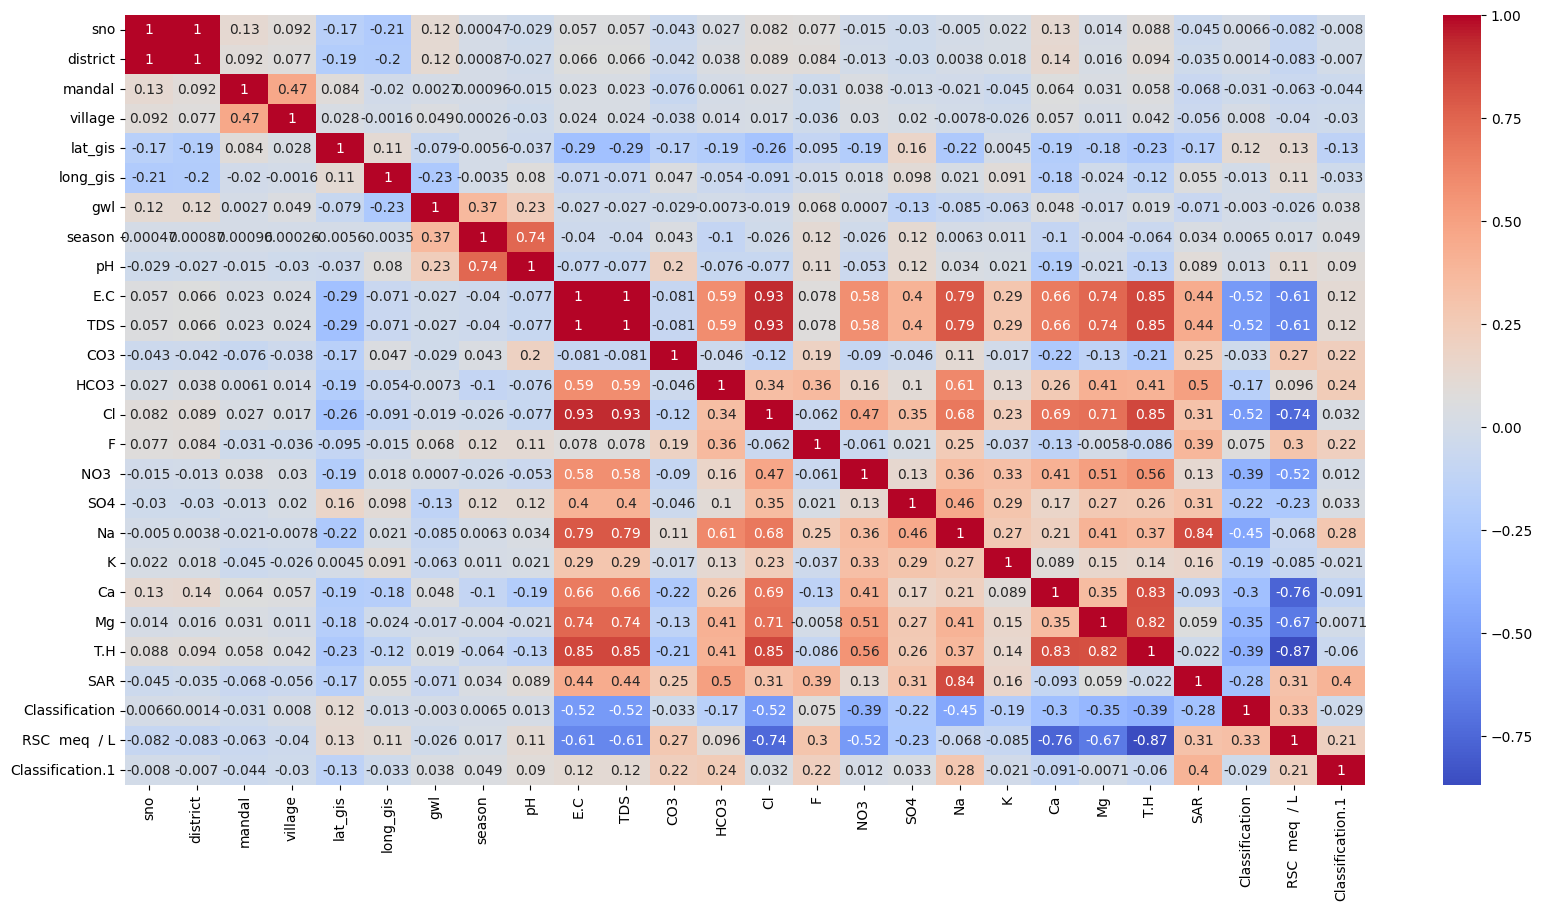

In [21]:
# Correlations
# Select only numeric features
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
# Display correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### Features selection

In [22]:
# Keep 10 features
# E.C : -0.52
# TDS : -0.52
# Cl : -0.52
# NO3 : -0.39
# Na : - 0.45
# Ca : 0.3
# Mg : - 0.35
# T.H : - 0.39
# SAR : -0.28
# RSC  meq  / L : 0.33

# Drop all the other columns
df = df[['E.C', 'TDS', 'Cl', 'NO3 ', 'Na', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L','Classification']]

# Check the columns
print(df.columns)

Index(['E.C', 'TDS', 'Cl', 'NO3 ', 'Na', 'Ca', 'Mg', 'T.H', 'SAR',
       'RSC  meq  / L', 'Classification'],
      dtype='object')


#### Duplicates 2nd check

In [23]:
# Check total duplicates
df.duplicated().sum()

8

In [24]:
# Drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Outliers

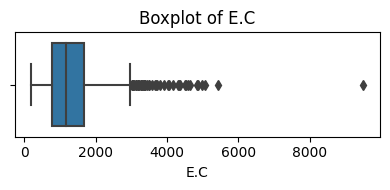

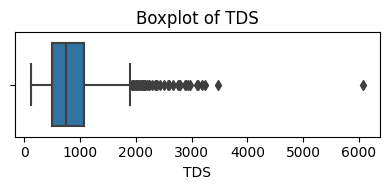

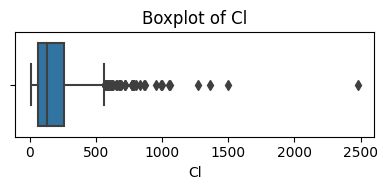

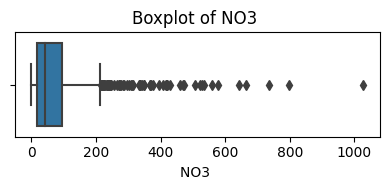

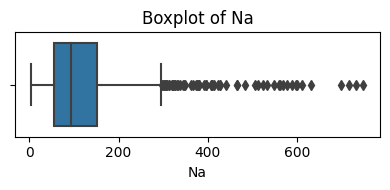

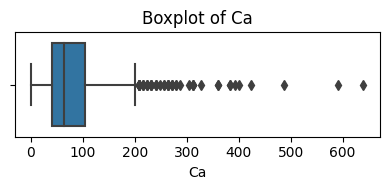

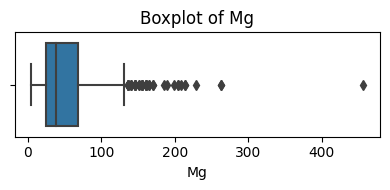

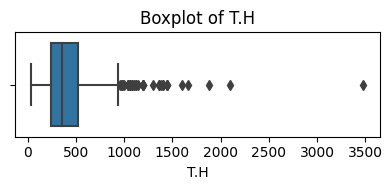

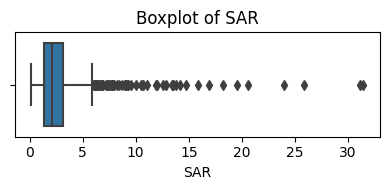

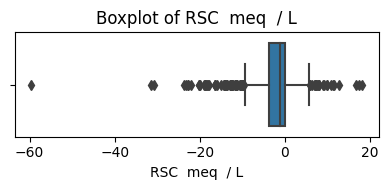

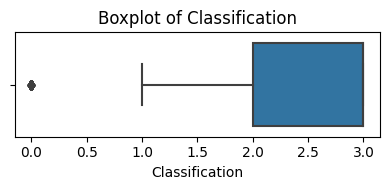

In [25]:
# Create separate boxplots for each feature
for column in df:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

In [26]:
df.sample(7)

,E.C,TDS,Cl,NO3,Na,Ca,Mg,T.H,SAR,RSC meq / L,Classification
232,2070,1324.80,310,84.151000,112.000000,104.0,126.412,779.786184,1.743823,-5.395724,3
48,1118,715.52,130,35.834636,225.000000,32.0,72.930,379.876645,5.019187,3.002467,3
121,212,135.68,20,22.547636,22.000000,8.0,9.724,59.983553,1.235034,-0.599671,1
8,2420,1548.80,290,134.883182,321.000000,48.0,97.240,519.835526,6.121308,-1.996711,0
242,1169,748.16,130,20.670143,91.000000,104.0,29.172,379.950658,2.029785,-0.599013,3
223,952,609.28,140,59.992818,132.000000,40.0,82.654,439.860197,2.736458,-2.797204,3
371,1275,816.00,90,29.231400,147.248057,64.0,38.896,319.934211,3.579245,-0.721993,3


In [27]:
# Define a function to drop outliers from a column
# def drop_outliers(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return column[(column >= lower_bound) & (column <= upper_bound)]

# # Drop outliers from all columns except the target column
# for column in df:
#     if column != 'Classification':
#         df[column] = drop_outliers(df[column]).reset_index(drop=True)

# Replace outliers with the lower and upper bound (depending on the side of the outlier)
def impute_outliers(df, feature):
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

for feature in df:
    if feature != 'Classification':
        impute_outliers(df, feature)

# Models

In [28]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier


In [29]:

def evaluations_matrix (y_test, y_prediction):
    evaluation = {}
    evaluation['accuracy'] = accuracy_score(y_test, y_prediction)
    evaluation['precision'] = precision_score(y_test, y_prediction, average='weighted')
    evaluation['recall'] = recall_score(y_test, y_prediction, average='weighted')
    evaluation['f1_score'] = f1_score(y_test, y_prediction, average='weighted')
    return evaluation

In [30]:
# 
def average_dictionnary(list_dict):
    accuracy=0
    precision=0
    recall=0
    f1_score=0

    for dict in list_dict:
        accuracy+=dict['accuracy']
        precision+=dict['precision']
        recall+=dict['recall']
        f1_score+=dict['f1_score']
    return {'accuracy':accuracy/len(list_dict)*100, 'precision':precision/len(list_dict)*100, 'recall':recall/len(list_dict)*100, 'f1_score':f1_score/len(list_dict)*100}
        

In [31]:

# Without parameter tuning
evaluations_knn = []
evaluations_xgb = []
evaluations_rfc = []
evaluations_svm = []
evaluations_tree = []
evaluations_abc = []

# With parameter tuning
p_evaluations_knn = []
p_evaluations_xgb = []
p_evaluations_rfc = []
p_evaluations_svm = []
p_evaluations_tree = []
p_evaluations_abc = []



X = df.drop(['Classification'], axis=1)
y = df['Classification']

# Using K-Fold for splitting
kfold =KFold(n_splits=5, shuffle=True, random_state=42)

# 
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# KNN
    knn_model = KNeighborsClassifier()
    # Training of knn model on training datas
    knn_model.fit(X_train, y_train)
    # Evaluation of knn model on test datas
    y_prediction = knn_model.predict(X_test)
    # Append evaluation of knn model on the list
    evaluations_knn.append(evaluations_matrix(y_test, y_prediction))

# SVM
    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    y_prediction = svm_model.predict(X_test)
    evaluations_svm.append(evaluations_matrix(y_test, y_prediction))

# tree
    tree_model = tree.DecisionTreeClassifier()
    tree_model = tree_model.fit(X_train, y_train)
    y_prediction = tree_model.predict(X_test)
    evaluations_tree.append(evaluations_matrix(y_test, y_prediction))

# Random Forest
    rfc_model = RandomForestClassifier()
    rfc_model = rfc_model.fit(X_train, y_train)
    y_prediction = rfc_model.predict(X_test)
    evaluations_rfc.append(evaluations_matrix(y_test, y_prediction))

# XGBoost
    xgb_model = XGBClassifier()
    xgb_model = xgb_model.fit(X_train, y_train)
    y_prediction = xgb_model.predict(X_test)
    evaluations_xgb.append(evaluations_matrix(y_test, y_prediction))

# AdaBoost
    abc_model = AdaBoostClassifier()
    abc_model = abc_model.fit (X_train, y_train)
    y_prediction = abc_model.predict(X_test)
    evaluations_abc.append(evaluations_matrix(y_test, y_prediction))

# KNN parameters
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn_model.fit(X_train, y_train)
    y_prediction = knn_model.predict(X_test)
    p_evaluations_knn.append(evaluations_matrix(y_test, y_prediction))

# SVM parameters
    svm_model = svm.SVC(kernel='linear', C=3)
    svm_model.fit(X_train, y_train)
    y_prediction = svm_model.predict(X_test)
    p_evaluations_svm.append(evaluations_matrix(y_test, y_prediction))

# tree parameters
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', splitter= 'random', max_depth=150)
    tree_model = tree_model.fit(X_train, y_train)
    y_prediction = tree_model.predict(X_test)
    p_evaluations_tree.append(evaluations_matrix(y_test, y_prediction))

# Random Forest parameters
    rfc_model = RandomForestClassifier(n_estimators=10, criterion='log_loss')
    rfc_model = rfc_model.fit(X_train, y_train)
    y_prediction = rfc_model.predict(X_test)
    p_evaluations_rfc.append(evaluations_matrix(y_test, y_prediction))

# XGBoost parameters
    xgb_model = XGBClassifier(n_estimators = 80, verbosity = 3, learning_rate = 0.4, max_depth = 100)
    xgb_model = xgb_model.fit(X_train, y_train)
    y_prediction = xgb_model.predict(X_test)
    p_evaluations_xgb.append(evaluations_matrix(y_test, y_prediction))

# AdaBoost parameters
    abc_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
    abc_model = abc_model.fit (X_train, y_train)
    y_prediction = abc_model.predict(X_test)
    p_evaluations_abc.append(evaluations_matrix(y_test, y_prediction))



evaluations_knn = average_dictionnary(evaluations_knn)
evaluations_xgb = average_dictionnary(evaluations_xgb)
evaluations_rfc = average_dictionnary(evaluations_rfc)
evaluations_svm = average_dictionnary(evaluations_svm)
evaluations_tree = average_dictionnary(evaluations_tree)
evaluations_abc = average_dictionnary(evaluations_abc)

p_evaluations_knn= average_dictionnary(p_evaluations_knn)
p_evaluations_xgb = average_dictionnary(p_evaluations_xgb)
p_evaluations_rfc = average_dictionnary(p_evaluations_rfc)
p_evaluations_svm = average_dictionnary(p_evaluations_svm)
p_evaluations_tree = average_dictionnary(p_evaluations_tree)
p_evaluations_abc = average_dictionnary(p_evaluations_abc)


evaluation = pd.DataFrame([evaluations_knn, evaluations_xgb, evaluations_rfc, evaluations_svm, evaluations_tree, evaluations_abc, p_evaluations_knn, p_evaluations_xgb, p_evaluations_rfc, p_evaluations_svm, p_evaluations_tree, p_evaluations_abc
]).round(2)
evaluation.index = ['knn', 'xgb', 'rfc', 'svm', 'tree', 'abc', 'knn 2', 'xgb 2', 'rfc 2', 'svm 2', 'tree 2', 'abc 2']
evaluation



/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[16:58:29] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:29] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:29] INFO: ../src/tree/updater_prune.cc:9

/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[16:58:36] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:36] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:36] INFO: ../src/tree/updater_prune.cc:9

/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

[16:58:38] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:38] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:38] INFO: ../src/tree/updater_prune.cc:9

/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[16:58:44] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:44] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:44] INFO: ../src/tree/updater_prune.cc:9

/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

[16:58:51] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:51] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:58:51] INFO: ../src/tree/updater_prune.cc:9

/home/zaphyra/Documents/Vscode/iadev-py/numpy_py/.venvnumpy/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1_score
knn,98.17,97.96,98.17,98.04
xgb,99.09,98.93,99.09,98.99
rfc,99.27,99.11,99.27,99.17
svm,97.81,97.59,97.81,97.67
tree,98.81,98.93,98.81,98.84
abc,99.09,98.84,99.09,98.94
knn 2,98.17,97.96,98.17,98.04
xgb 2,99.18,99.02,99.18,99.08
rfc 2,99.27,99.11,99.27,99.18
svm 2,97.99,97.82,97.99,97.89
